In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [3]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
from sklearn.datasets import load_digits

def load_digits():
    digits = load_digits()
    return digits


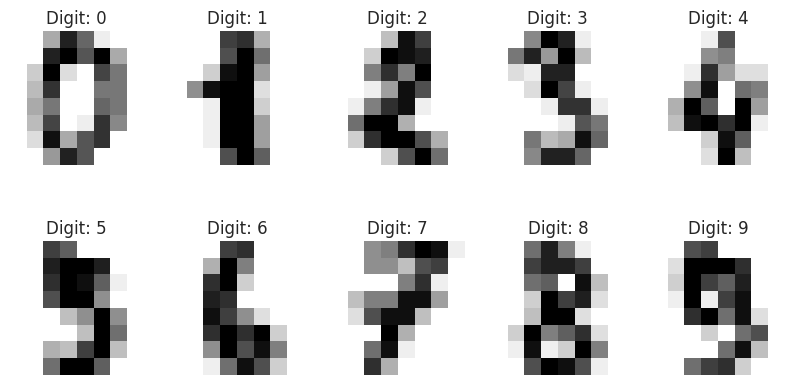

In [4]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(digits.images[i], cmap=plt.cm.gray_r)
    axes[i].set_title("Digit: {}".format(digits.target[i]))
    axes[i].axis('off')

plt.show()


In [5]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.data[0])


(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [9]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

from sklearn.cluster import KMeans

def predict(n_clusters:int,random_state:int,digits):
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = model.fit_predict(digits.data)
    return model, clusters



In [11]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
model, clusters = predict(n_clusters=10, random_state=0, digits=digits)
print(model.cluster_centers_.shape)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


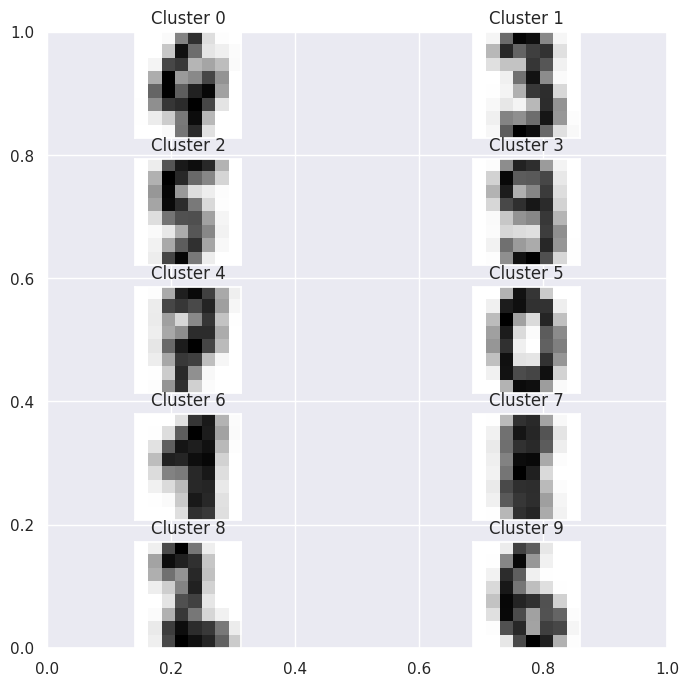

In [13]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
import matplotlib.pyplot as plt

# először betöltjük az adatokat
from sklearn.datasets import load_digits
digits = load_digits()

# definiáljuk a függvényt, ami létrehozza és betanítja a modellt
def predict(n_clusters:int,random_state:int,digits):
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = model.fit_predict(digits.data)
    return model, clusters

# hívjuk meg a függvényt a model és a cluster címkék előállításához
model, clusters = predict(n_clusters=10, random_state=0, digits=digits)

# kirajzoljuk a klaszterközéppontokat
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(10):
    subplot = fig.add_subplot(5, 2, i+1)
    subplot.imshow(model.cluster_centers_[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('Cluster %d' % i)
plt.show()



In [14]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray
import numpy as np

def get_labels(clusters: np.ndarray, digits):
    result = np.zeros_like(clusters)
    for cluster in range(10):
        mask = (clusters == cluster)
        target = digits.target[mask]
        mode = np.bincount(target).argmax()
        result[mask] = mode
    return result


In [15]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
from sklearn.metrics import accuracy_score

def calc_accuracy(target_labels:np.ndarray, predicted_labels:np.ndarray) -> float:
    accuracy = accuracy_score(target_labels, predicted_labels)
    return round(accuracy, 2)


In [16]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(target_labels: np.ndarray, predicted_labels: np.ndarray):
    # Kiszámoljuk a confusion mátrixot
    cm = confusion_matrix(target_labels, predicted_labels)
    
    # Plot
    sns.heatmap(cm, annot=True, cmap='Blues')
